In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [3]:
n_samples = 200
n_outliers = 20
total = n_samples + n_outliers

np.random.seed(42)

In [4]:
def simulate_feature(normal_mean, normal_std, outlier_mean, outlier_std):
    normal = np.random.normal(loc=normal_mean, scale=normal_std, size=n_samples)
    outliers = np.random.normal(loc=outlier_mean, scale=outlier_std, size=n_outliers)
    return np.concatenate([normal, outliers])

df = pd.DataFrame({
    "tx_total": simulate_feature(120, 30, 400, 50),
    "avg_tx_per_day": simulate_feature(3.0, 0.5, 10.0, 1.5),
    "avg_tx_per_block": simulate_feature(0.03, 0.01, 0.2, 0.05),
    "max_tx_per_block": simulate_feature(5, 1, 20, 5),
    "min_tx_per_block": simulate_feature(0, 0.5, 2, 1),
    "std_tx_amount": simulate_feature(0.05, 0.02, 0.3, 0.1),
    "tx_between_00_04": simulate_feature(0.02, 0.01, 0.2, 0.05),
    "num_unique_counterparties": simulate_feature(50, 10, 200, 30),
    "same_day_deposit_withdraw": np.concatenate([np.zeros(n_samples), np.ones(n_outliers)]),
    "most_common_amount": simulate_feature(0.01, 0.005, 1.0, 0.3)
})

In [24]:
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Model Isolation Forest
model = IsolationForest(contamination=n_outliers / total, random_state=42)
df["anomaly"] = model.fit_predict(X_scaled)
df["is_anomaly"] = df["anomaly"] == -1

In [25]:
df.head()

,tx_total,avg_tx_per_day,avg_tx_per_block,max_tx_per_block,min_tx_per_block,std_tx_amount,tx_between_00_04,num_unique_counterparties,same_day_deposit_withdraw,most_common_amount,anomaly,is_anomaly
0,134.901425,4.157329,0.033841,4.426338,1.263466,0.069960,0.020566,49.724851,0.0,0.018200,1,False
1,115.852071,2.066367,0.029673,4.453141,-0.265434,-0.007925,0.025297,67.722516,0.0,0.013711,1,False
2,139.430656,3.343130,0.009326,4.967247,-0.244720,0.091767,0.019295,66.612592,0.0,0.010377,1,False
3,165.690896,2.193642,0.029109,4.456575,0.522080,0.047208,0.024865,45.429037,0.0,0.001990,1,False
4,112.975399,2.764034,0.016955,4.287154,0.340946,0.072164,0.020645,43.977879,0.0,0.008770,1,False


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

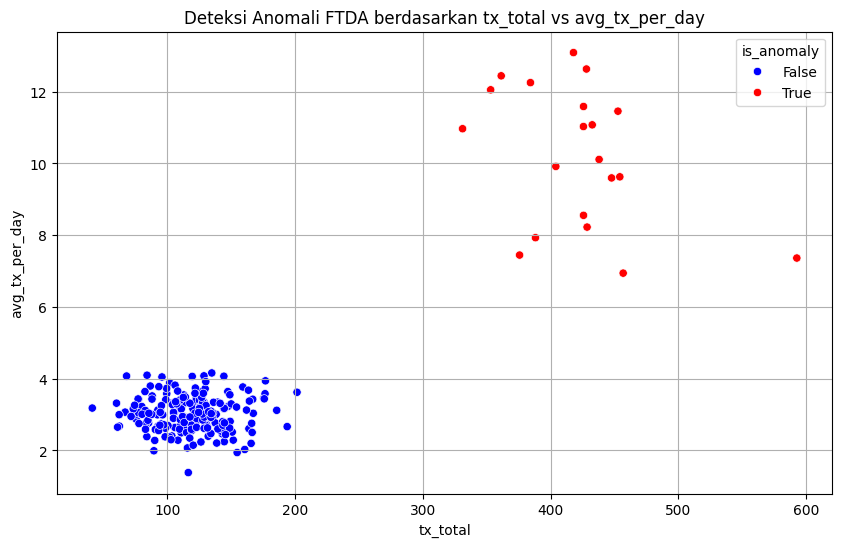

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="tx_total", y="avg_tx_per_day", hue="is_anomaly", palette=["blue", "red"])
plt.title("Deteksi Anomali FTDA berdasarkan tx_total vs avg_tx_per_day")
plt.grid(True)
plt.show()

In [26]:
import shap

In [28]:
features = df.drop(columns=["anomaly", "is_anomaly"])

In [29]:
normal_sample = np.random.choice(df[df["is_anomaly"] == False].index, size=100, replace=False)
sample = np.append(df[df["is_anomaly"]==True].index, normal_sample)

In [30]:
len(sample)

120

In [32]:
model.fit(features)

,n_estimators,100
,max_samples,'auto'
,contamination,0.09090909090909091
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [33]:
explainer = shap.Explainer(model.decision_function, features)
shap_values = explainer(features.iloc[sample])

ExactExplainer explainer: 121it [00:31,  2.64it/s]                         


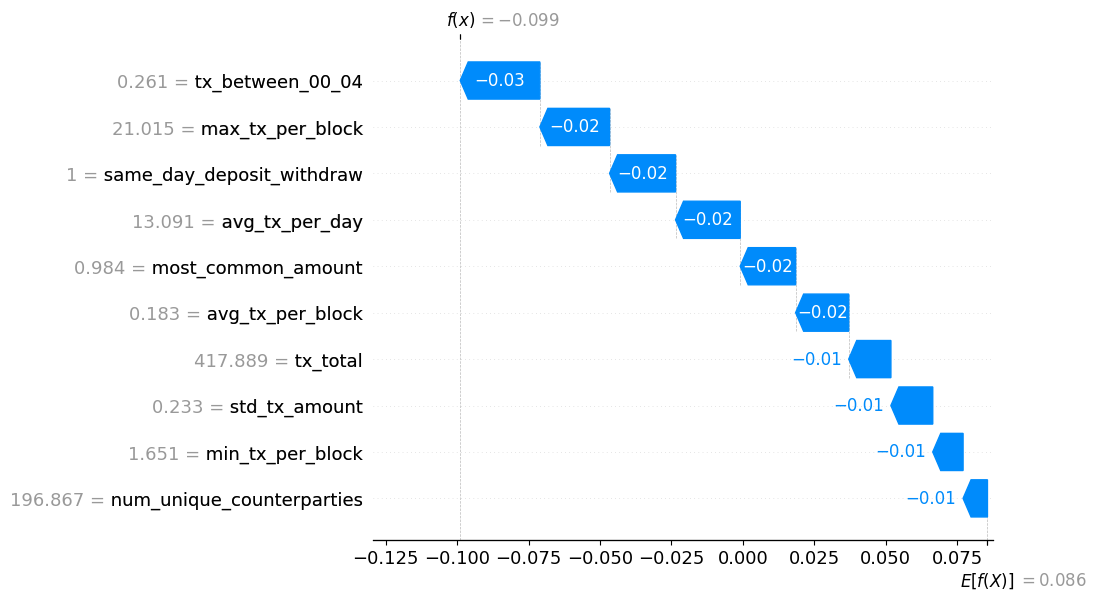

In [35]:
shap.plots.waterfall(shap_values[0], max_display=10, show=True)

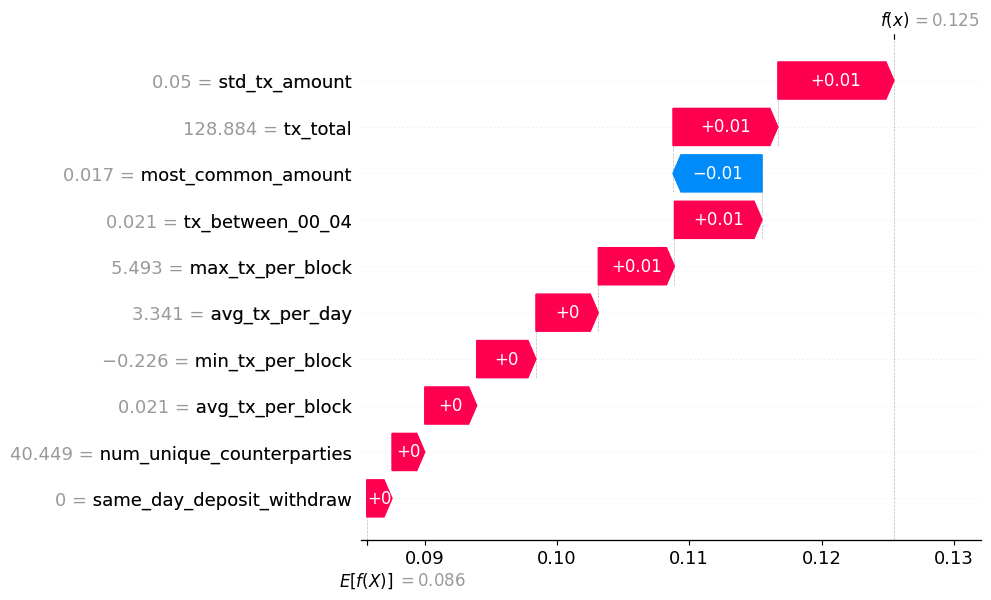

In [36]:
shap.plots.waterfall(shap_values[100], max_display=10, show=True)